### Task 1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (12, 8)

### Task 2: Load the Data

The adverstiting dataset captures sales revenue generated with respect to advertisement spends across multiple channles like radio, tv and newspaper.

In [3]:
advert = pd.read_csv('Advertising.csv')
advert.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [16]:
advert.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<AxesSubplot:>

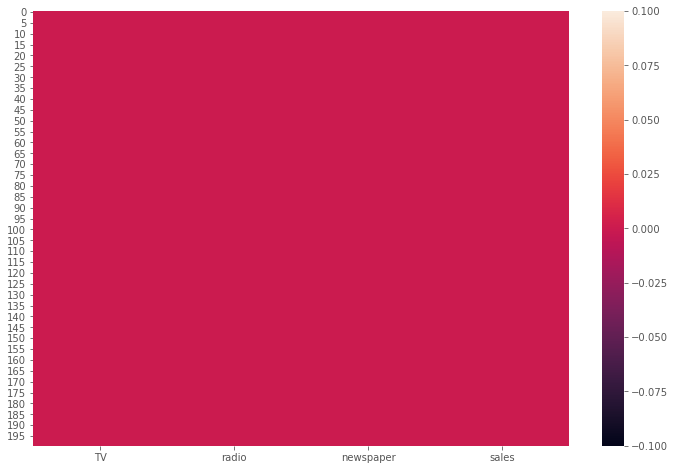

In [17]:
sns.heatmap(advert.isnull())

### Task 3: Relationship between Features and Response

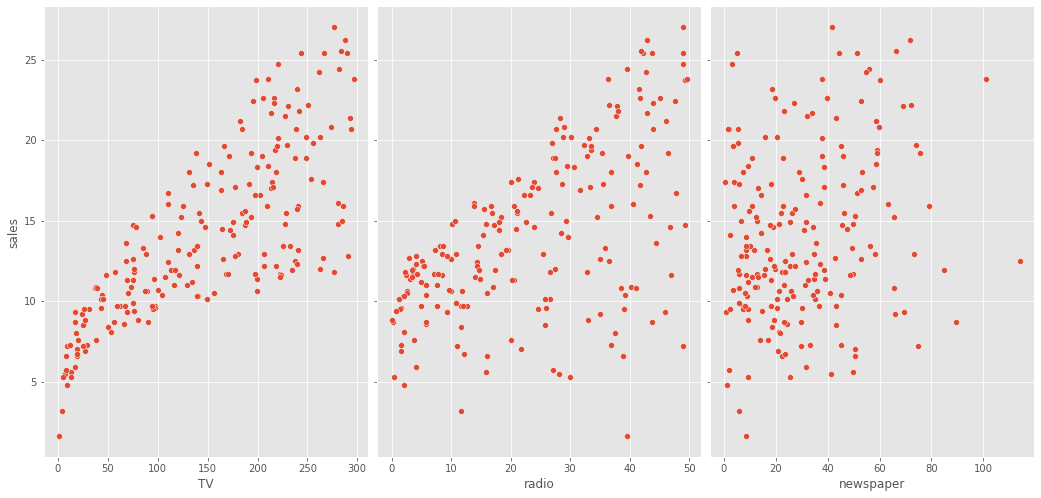

In [5]:
sns.pairplot(advert, x_vars=['TV','radio','newspaper'], y_vars='sales', height=7, aspect=0.7);

### Task 4: Multiple Linear Regression - Estimating Coefficients

In [6]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['TV', 'radio', 'newspaper']
X = advert[feature_cols]
y = advert.sales

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [7]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm1.coef_))

[('TV', 0.04576464545539761),
 ('radio', 0.18853001691820453),
 ('newspaper', -0.00103749304247629)]

<AxesSubplot:>

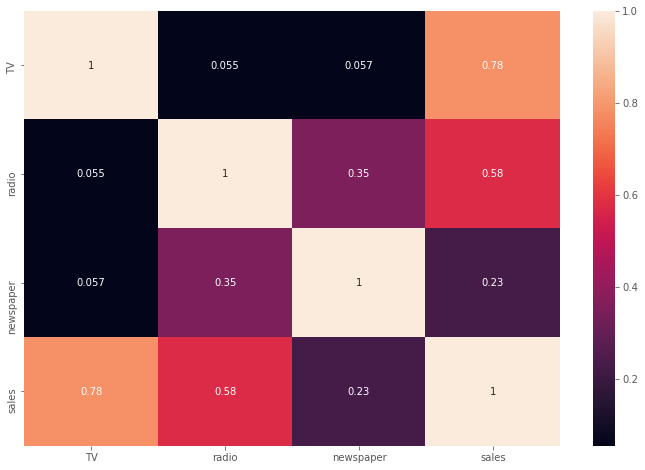

In [8]:
sns.heatmap(advert.corr(), annot=True)

### Task 5: Feature Selection

In [9]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['TV', 'radio']], y)
lm2_preds = lm2.predict(X[['TV', 'radio']])

print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.8971942610828957


In [10]:
lm3 = LinearRegression().fit(X[['TV', 'radio', 'newspaper']], y)
lm3_preds = lm3.predict(X[['TV', 'radio', 'newspaper']])

print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.8972106381789522


### Task 6: Model Evaluation Using Train/Test Split and Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} \left |y_i - \hat{y_i} \right |$$</h5>
**Mean Squared Error** (MSE) is the mean of the squared errors: <h5 align=center>$$\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2$$</h5>
**Root Mean Squared Error** (RMSE) is the mean of the squared errors: <h5 align=center>$$\sqrt{\frac{1}{n}\sum_{i=1}^{n} (y_i - \hat{y_i})^2}$$</h5>

Let's use train/test split with RMSE to see whether newspaper should be kept in the model:

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = advert[['TV', 'radio', 'newspaper']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 1.404651423032895
R^2:  0.9156213613792232


In [15]:
X = advert[['TV', 'radio']]
y = advert.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE : 1.3879034699382888
R^2:  0.9176214942248908


# MULTIPLE MODEL 

In [18]:
# import training dependencies
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor

In [19]:
# import the evaluation metrics dependenices
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score,mean_squared_error

In [20]:
def train_n_ret_scores(model):
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    print('MSE:',mean_squared_error(y_test,y_preds))
    print('R2_Score',r2_score(y_test,y_preds))    

In [21]:
# try1: Linear Regression
train_n_ret_scores(LinearRegression())

MSE: 1.9262760418667424
R2_Score 0.9176214942248908


In [22]:
# try2: Ridge Regression
train_n_ret_scores(Ridge(alpha=0.001))

MSE: 1.9262761027067716
R2_Score 0.9176214916230255


In [23]:
# try3: Lasso Regression
train_n_ret_scores(Lasso(alpha=0.00003))

MSE: 1.9262777044968948
R2_Score 0.9176214231213808


In [27]:
# try4: SVR
train_n_ret_scores(SVR(kernel='linear'))

MSE: 1.7423130924153143
R2_Score 0.9254887949462891


In [28]:
# try5: Decision Trees
train_n_ret_scores(DecisionTreeRegressor(criterion='mse'))

MSE: 0.7882000000000003
R2_Score 0.9662920906242404


In [29]:
# try6: Random Forest
train_n_ret_scores(RandomForestRegressor(n_estimators=500))

MSE: 0.2516866976000022
R2_Score 0.989236447102531


In [30]:
# try7: Gradient Boosting
train_n_ret_scores(GradientBoostingRegressor())

MSE: 0.30460727355496336
R2_Score 0.9869732626589851


In [31]:
# try8: Adaboost
train_n_ret_scores(AdaBoostRegressor(base_estimator=LinearRegression()))

MSE: 2.3649107170447525
R2_Score 0.8988629838468571


In [32]:
#let's create the models dataframe
models = [LinearRegression(),Ridge(alpha=0.001),Lasso(alpha=0.0003),SVR(kernel='linear'),DecisionTreeRegressor(),RandomForestRegressor(),GradientBoostingRegressor(),AdaBoostRegressor(base_estimator=LinearRegression())]
model_names = 'Linear Ridge Lasso  SVR Descision_Tree Random_Forest Gradient_Boost Ada_Boost'.split()
models_df = pd.DataFrame(columns=['Model','MSE','R2','meanCV'])
for model,model_names in zip(models,model_names):
    print(model)
    
    model.fit(X_train,y_train)
    
    y_preds = model.predict(X_test)
    print(y_preds)
    
    mse = mean_squared_error(y_test,y_preds)
    r2 = r2_score(y_test,y_preds)
    avgCV = np.mean(cross_val_score(model,X,y,scoring='r2'))
    
    
    models_df = models_df.append({'Model':model_names,'MSE':mse,'R2':r2,'meanCV':avgCV},ignore_index=True)


LinearRegression()
[21.73751851 16.40451622  7.64073276 17.81512707 18.6140367  23.75320401
 16.26267467 13.30968011  9.11623605 17.24121988 14.37997584  9.86630093
 17.28107008 16.70455883 14.93571851 15.47067849 12.39847009 17.21737409
 11.18626133 18.09114847  9.34543641 12.71804909  8.75327159 10.468843
 11.34116649 14.98646893  9.77329331 19.43186663 18.31005062 17.14215851
 21.62609193 14.47149683 16.3536012  12.27215653 19.97488243 15.34878155
 13.90760851  9.99030388 20.98440888  7.482353    3.61019982  7.1944428
  5.99097416 18.39958364  8.35858094 14.12195436 15.05074527 20.38304162
 20.65191677 19.47457534]
Ridge(alpha=0.001)
[21.73751837 16.40451622  7.64073287 17.81512714 18.61403671 23.75320391
 16.26267462 13.30968018  9.11623608 17.24121988 14.37997585  9.86630095
 17.28107008 16.7045587  14.93571859 15.47067842 12.39847011 17.21737419
 11.18626125 18.09114844  9.34543648 12.71804902  8.75327157 10.46884305
 11.34116652 14.98646895  9.77329329 19.43186661 18.31005052 17

In [33]:
models_df

,Model,MSE,R2,meanCV
0,Linear,1.926276,0.917621,0.889283
1,Ridge,1.926276,0.917621,0.889283
2,Lasso,1.926290,0.917621,0.889283
3,SVR,1.742313,0.925489,0.881520
4,Descision_Tree,0.548200,0.976556,0.960875
5,Random_Forest,0.261081,0.988835,0.978766
6,Gradient_Boost,0.304852,0.986963,0.978328
7,Ada_Boost,2.216904,0.905193,0.891687
